In [ ]:
#https://www.kaggle.com/code/shawkyelgendy/pump-sensor-data-timeseriesanalysis/input?select=sensor.csv
#Part 1. Data Collection

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Step 1: Obtain the sensor data from the "sensor.csv" file
file_path = "/content/sensor.csv"
df_sensor = pd.read_csv(file_path)

# Display the first few rows of the sensor data to inspect the structure
print(df_sensor.head())




   Unnamed: 0            timestamp  sensor_00  sensor_01  sensor_02  \
0           0  2018-04-01 00:00:00   2.465394   47.09201    53.2118   
1           1  2018-04-01 00:01:00   2.465394   47.09201    53.2118   
2           2  2018-04-01 00:02:00   2.444734   47.35243    53.2118   
3           3  2018-04-01 00:03:00   2.460474   47.09201    53.1684   
4           4  2018-04-01 00:04:00   2.445718   47.13541    53.2118   

   sensor_03  sensor_04  sensor_05  sensor_06  sensor_07  ...  sensor_43  \
0  46.310760   634.3750   76.45975   13.41146   16.13136  ...   41.92708   
1  46.310760   634.3750   76.45975   13.41146   16.13136  ...   41.92708   
2  46.397570   638.8889   73.54598   13.32465   16.03733  ...   41.66666   
3  46.397568   628.1250   76.98898   13.31742   16.24711  ...   40.88541   
4  46.397568   636.4583   76.58897   13.35359   16.21094  ...   41.40625   

   sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  \
0  39.641200   65.68287   50.92593  38.194440

In [ ]:
#Part 2 : Data Cleaning and Exploration:

# Check for missing values and handle them appropriately (imputation, removal, or interpolation).
# Explore the dataset to understand the distribution, relationships, and patterns in the data.
# Identify outliers and decide whether to remove or transform them.

# Step 2: Check for missing values and handle them appropriately
# Check the percentage of missing values in each column
missing_percentage = df_sensor.isnull().mean() * 100

# Display columns with missing values and their respective percentages
print("Missing Percentage:")
print(missing_percentage)




Missing Percentage:
Unnamed: 0          0.000000
timestamp           0.000000
sensor_00           4.633261
sensor_01           0.167484
sensor_02           0.008624
sensor_03           0.008624
sensor_04           0.008624
sensor_05           0.008624
sensor_06           2.177741
sensor_07           2.474129
sensor_08           2.317992
sensor_09           2.085603
sensor_10           0.008624
sensor_11           0.008624
sensor_12           0.008624
sensor_13           0.008624
sensor_14           0.009532
sensor_15         100.000000
sensor_16           0.014070
sensor_17           0.020879
sensor_18           0.020879
sensor_19           0.007262
sensor_20           0.007262
sensor_21           0.007262
sensor_22           0.018609
sensor_23           0.007262
sensor_24           0.007262
sensor_25           0.016340
sensor_26           0.009078
sensor_27           0.007262
sensor_28           0.007262
sensor_29           0.032680
sensor_30           0.118464
sensor_31           0.0

Here are some ideas about NaN values handling for your reference.  There is no definitive answer to how to handle nan values in a dataset, as it depends on the context and the nature of the data. However, some general guidelines are:

- If the nan values are **less than 2%** of the observations in a column, you can **drop** those rows using `.dropna()` function.
- If the nan values are **between 3% and 40%** of the observations in a column, you can **fill** them with the mean, median, mode, or a specific value using `.fillna()` function². You can also use **imputation** methods like MICE or KNN to estimate the missing values.
- If the nan values are **more than 40%** of the observations in a column, you may want to **drop** the entire column using `.drop()` function, as it may not provide much information.

- [Introduction to Python Machine Learning and Dealing with NaN Values in ...](https://python.plainenglish.io/introduction-to-python-machine-learning-and-dealing-with-nan-values-in-a-data-set-using-pandas-bc185fa7aa5) ²
- [Check for NaN in Pandas DataFrame (examples included) - Data to Fish](https://datatofish.com/check-nan-pandas-dataframe/) ³

In [ ]:
# Handling missing values based on guidelines
# Drop rows with less than 2% missing values
threshold_percent = 2
df_sensor_cleaned = df_sensor.dropna(thresh=len(df_sensor) * (1 - threshold_percent / 100), axis=1)


In [ ]:
# Fill missing values in columns with 3% to 40% missing values using mean
columns_to_fill_mean = df_sensor_cleaned.columns[(df_sensor_cleaned.isnull().mean() > 0.03) & (df_sensor_cleaned.isnull().mean() < 0.4)]
df_sensor_cleaned[columns_to_fill_mean] = df_sensor_cleaned[columns_to_fill_mean].fillna(df_sensor_cleaned.mean())



<ipython-input-9-25d7292f57f8>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_sensor_cleaned[columns_to_fill_mean] = df_sensor_cleaned[columns_to_fill_mean].fillna(df_sensor_cleaned.mean())


In [ ]:
# Step 3: Explore the dataset to understand the distribution, relationships, and patterns in the data
# Summary statistics
print("Summary Statistics:")
print(df_sensor_cleaned.describe())


Summary Statistics:
          Unnamed: 0      sensor_01      sensor_02      sensor_03  \
count  220320.000000  219951.000000  220301.000000  220301.000000   
mean   110159.500000      47.591611      50.867392      43.752481   
std     63601.049991       3.296666       3.666820       2.418887   
min         0.000000       0.000000      33.159720      31.640620   
25%     55079.750000      46.310760      50.390620      42.838539   
50%    110159.500000      48.133678      51.649300      44.227428   
75%    165239.250000      49.479160      52.777770      45.312500   
max    220319.000000      56.727430      56.032990      48.220490   

           sensor_04      sensor_05      sensor_10      sensor_11  \
count  220301.000000  220301.000000  220301.000000  220301.000000   
mean      590.673936      73.396414      41.470339      41.918319   
std       144.023912      17.298247      12.093519      13.056425   
min         2.798032       0.000000       0.000000       0.000000   
25%       626

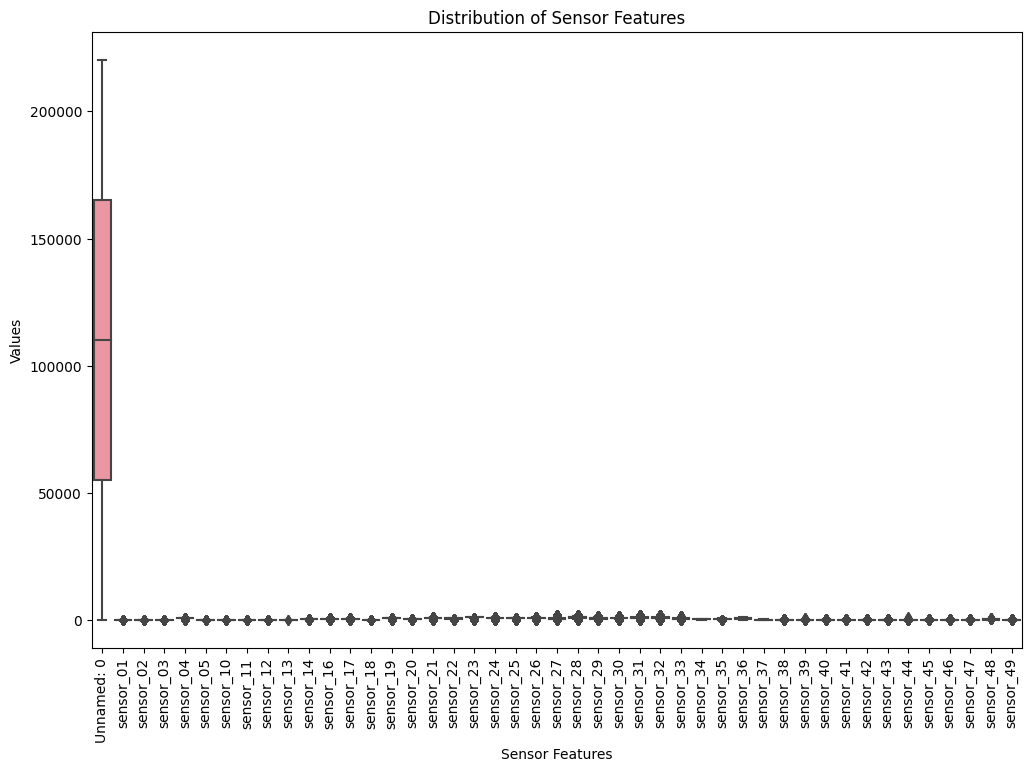

In [ ]:
# Distribution of sensor features using boxplot
plt.figure(figsize=(12, 8))

# Use seaborn's boxplot to visualize the distribution of each sensor feature
sns.boxplot(data=df_sensor_cleaned.drop(["timestamp", "machine_status"], axis=1))

# Add title and labels
plt.title("Distribution of Sensor Features")
plt.xlabel("Sensor Features")
plt.ylabel("Values")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()



Explanation of the Boxplot:
The boxplot consists of a "box" and "whiskers," and it represents the distribution of data for each sensor feature (column) in the cleaned dataset.
The "box" represents the interquartile range (IQR) of the data. It spans from the first quartile (Q1) to the third quartile (Q3), covering the middle 50% of the data.
The horizontal line inside the box represents the median (Q2), which is the middle value of the data when it is sorted in ascending order.
The "whiskers" extend from the edges of the box to the minimum and maximum values within a certain range (usually 1.5 times the IQR). Any data points beyond the whiskers are considered outliers and are plotted as individual points.
Outliers are represented as individual points beyond the whiskers. They are data points that fall significantly outside the overall distribution of the data.
Interpreting the Boxplot:
The boxplot allows us to quickly assess the spread and skewness of each sensor feature's distribution.
The height of the box indicates the range of the middle 50% of the data, with the median marked by the line inside the box.
The whiskers provide information about the range of the data, and any points beyond the whiskers are potential outliers.
Outliers, if present, can be easily identified as individual points outside the whiskers.
By analyzing the boxplot, you can get insights into the distribution and variability of each sensor feature, identify potential outliers, and assess if there are any abnormalities in the data that may require further investigation or handling.


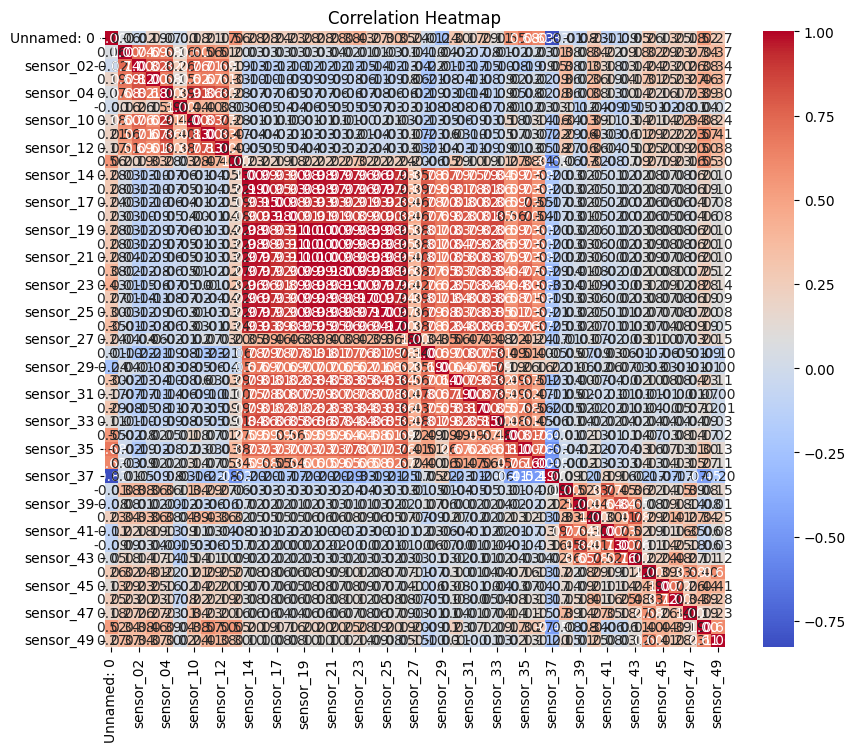

In [ ]:
# Pairwise correlation heatmap
plt.figure(figsize=(10, 8))

# Calculate the correlation matrix for all sensor features (excluding timestamp and machine_status)
correlation_matrix = df_sensor_cleaned.drop(["timestamp", "machine_status"], axis=1).corr()

# Use seaborn's heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Add title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()


Explanation of Pairwise Correlation Heatmap:

The pairwise correlation heatmap displays the correlation between all pairs of sensor features (columns) in the cleaned dataset df_sensor_cleaned.
Correlation is a statistical measure that indicates the extent to which two variables are related or move together. It ranges from -1 to +1, where -1 indicates a perfect negative correlation, 0 indicates no correlation, and +1 indicates a perfect positive correlation.
The heatmap uses colors to represent the correlation values. Positive correlations are shown in warmer colors (e.g., red or orange), while negative correlations are shown in cooler colors (e.g., blue).
The annotations inside the heatmap display the actual correlation values. The higher the absolute value of the correlation, the stronger the relationship between the two features.

Interpreting the Pairwise Correlation Heatmap:

Strong positive correlations (values close to +1) between pairs of sensor features indicate that they tend to increase or decrease together. For example, if feature A has a strong positive correlation with feature B, when A increases, B also tends to increase.
Strong negative correlations (values close to -1) between pairs of sensor features indicate that they tend to move in opposite directions. For example, if feature X has a strong negative correlation with feature Y, when X increases, Y tends to decrease.
A correlation close to 0 indicates a weak or no linear relationship between the two features. However, it's essential to note that nonlinear relationships may exist, which cannot be captured by the correlation matrix.
The correlation heatmap helps identify potential multicollinearity, which is when two or more features are highly correlated. Multicollinearity can be problematic for some machine learning algorithms, as it can lead to unstable models and difficulties in interpreting feature importance.



In [ ]:
# Distribution of the target variable "machine_status"
plt.figure(figsize=(6, 4))


<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

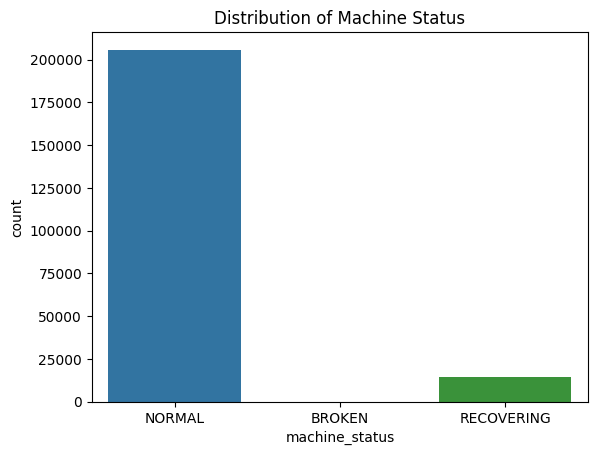

In [ ]:
# Use seaborn's countplot to visualize the distribution of the machine_status column
sns.countplot(x="machine_status", data=df_sensor_cleaned)

# Add title
plt.title("Distribution of Machine Status")

# Show the plot
plt.show()



Explanation of Distribution of Machine Status:

The countplot displays the distribution of the target variable "machine_status" in the cleaned dataset df_sensor_cleaned.
In this plot, the x-axis represents the three machine status categories (e.g., "NORMAL", "BROKEN", "RECOVERING").
The y-axis represents the count of occurrences of each machine status category in the dataset.

Interpreting the Distribution of Machine Status:

The countplot helps us understand the class distribution of the target variable. It shows how many instances belong to each machine status category.
A balanced distribution, where each class has a similar number of instances, is desirable for classification tasks, as it prevents bias toward any specific class.
An imbalanced distribution, where one or more classes have significantly fewer instances, may require special handling, such as using resampling techniques or selecting appropriate evaluation metrics (e.g., precision, recall, F1-score) to assess the model's performance.

Overall, these plots provide valuable insights into the relationships between sensor features and the distribution of machine statuses, which can be used to guide further analysis and modeling decisions.


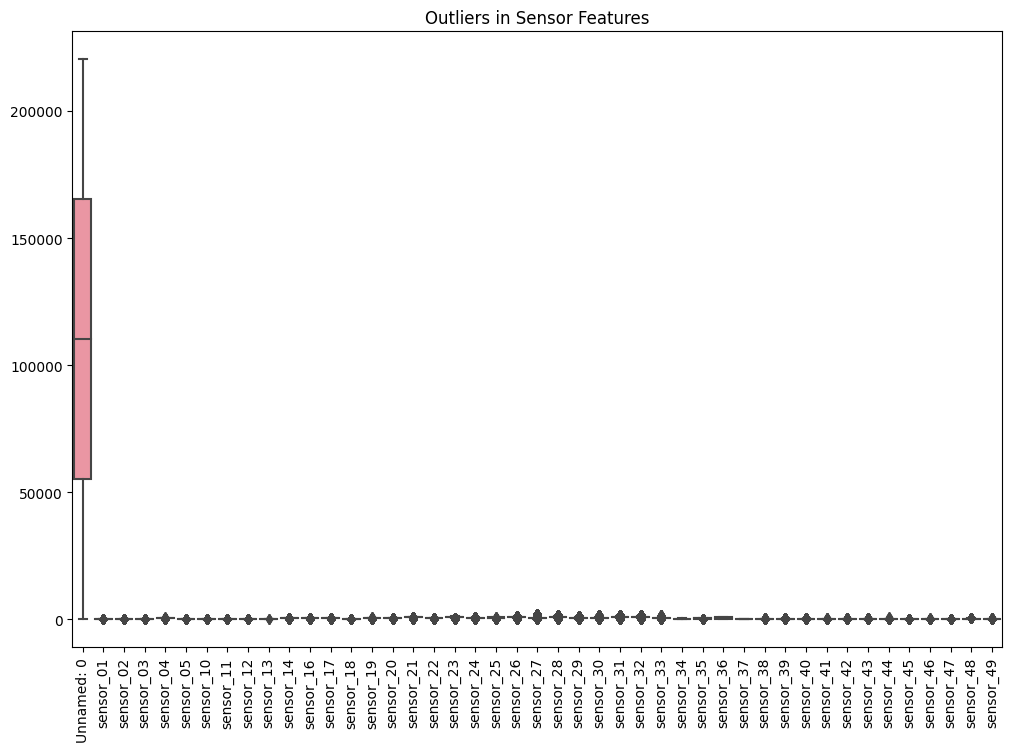

In [ ]:
# Step 4: Identify outliers and decide whether to remove or transform them
# Boxplot to visualize outliers in sensor features
plt.figure(figsize=(12, 8))

# Use seaborn's boxplot to visualize the distribution and identify outliers in each sensor feature
sns.boxplot(data=df_sensor_cleaned.drop(["timestamp", "machine_status"], axis=1))

# Add title
plt.title("Outliers in Sensor Features")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()


Explanation of Boxplot to Visualize Outliers in Sensor Features:
The boxplot provides a visual representation of the distribution of each sensor feature (excluding timestamp and machine_status) in the cleaned dataset df_sensor_cleaned.
It shows the median (middle line of the box), interquartile range (IQR, the box's height), and the whiskers (lines extending from the box) that represent the data spread.
Points beyond the whiskers are considered outliers and are plotted individually as circles.
Interpreting the Boxplot:
The box's bottom and top represent the 25th and 75th percentiles (Q1 and Q3, respectively), and the middle line inside the box is the median (50th percentile).
The IQR, the height of the box, represents the range between Q1 and Q3, covering the central 50% of the data.
Outliers are individual data points that fall significantly outside the IQR. They are plotted as individual points beyond the whiskers.
Outliers may indicate potential errors in the data or genuine extreme values in the sensor readings. Deciding what to do with outliers depends on the nature of the data and the specific analysis or modeling task.
Removing outliers can help improve the performance of certain machine learning algorithms that are sensitive to extreme values. However, it is essential to be cautious and consider the context before outrightly removing them, as they might contain valuable information or indicate critical events.
Alternatively, transforming the data using methods like log transformation can sometimes reduce the impact of outliers and make the data more suitable for certain algorithms.
In conclusion, the boxplot is a useful tool for identifying potential outliers in the sensor features, but further analysis and domain knowledge are necessary to make informed decisions on how to handle these outliers effectively.


In [ ]:
# #Part 3: Feature Engineering:

# Extract relevant features from the raw sensor data.
# Create lag features and rolling statistics to capture historical patterns.
# Engineer features from maintenance logs and failure records that can help in predicting failures.
# Feature Engineering: Extract relevant features from the raw sensor data

# # Convert the 'timestamp' column to datetime format
# df_sensor_cleaned = df_sensor_cleaned.copy()
# df_sensor_cleaned['timestamp'] = pd.to_datetime(df_sensor_cleaned['timestamp'])
# Convert the 'timestamp' column to datetime format
df_sensor['timestamp'] = pd.to_datetime(df_sensor['timestamp'])

# Sort the data by timestamp (optional but useful for time-series data)
df_sensor.sort_values(by='timestamp', inplace=True)


In [ ]:
# Feature Engineering: Engineer lag features and rolling statistics for all sensors

# Define the list of sensor columns (excluding 'timestamp' and 'machine_status')
sensor_columns = df_sensor.drop(['timestamp', 'machine_status'], axis=1).columns


In [ ]:
# Create lag features for all sensors with a lag of 1 timestep
for sensor in sensor_columns:
    df_sensor[f'{sensor}_lag_1'] = df_sensor[sensor].shift(1)
# Create rolling mean features for all sensors with a window of 3 timesteps
for sensor in sensor_columns:
    df_sensor[f'{sensor}_rolling_mean'] = df_sensor[sensor].rolling(window=3, min_periods=1).mean()

# Create rolling standard deviation features for all sensors with a window of 5 timesteps
for sensor in sensor_columns:
    df_sensor[f'{sensor}_rolling_std'] = df_sensor[sensor].rolling(window=5, min_periods=1).std()




<ipython-input-26-c89aa7050997>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_sensor[f'{sensor}_rolling_mean'] = df_sensor[sensor].rolling(window=3, min_periods=1).mean()
<ipython-input-26-c89aa7050997>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_sensor[f'{sensor}_rolling_mean'] = df_sensor[sensor].rolling(window=3, min_periods=1).mean()
<ipython-input-26-c89aa7050997>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.

In [ ]:
# Feature Engineering: Extracting date-related features

# Extract year, month, day, hour, and minute from the 'timestamp' column
df_sensor['year'] = df_sensor['timestamp'].dt.year
df_sensor['month'] = df_sensor['timestamp'].dt.month
df_sensor['day'] = df_sensor['timestamp'].dt.day
df_sensor['hour'] = df_sensor['timestamp'].dt.hour
df_sensor['minute'] = df_sensor['timestamp'].dt.minute


<ipython-input-27-4da207909584>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_sensor['year'] = df_sensor['timestamp'].dt.year
<ipython-input-27-4da207909584>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_sensor['month'] = df_sensor['timestamp'].dt.month
<ipython-input-27-4da207909584>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-frag

In [ ]:
# Feature Engineering: Handling cyclic features

# Encode cyclic features like 'hour' and 'minute' using trigonometric transformation
df_sensor['hour_sin'] = df_sensor['hour'].apply(lambda x: np.sin(2 * np.pi * x / 24))
df_sensor['hour_cos'] = df_sensor['hour'].apply(lambda x: np.cos(2 * np.pi * x / 24))
df_sensor['minute_sin'] = df_sensor['minute'].apply(lambda x: np.sin(2 * np.pi * x / 60))
df_sensor['minute_cos'] = df_sensor['minute'].apply(lambda x: np.cos(2 * np.pi * x / 60))


<ipython-input-28-3c93fe83e631>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_sensor['hour_sin'] = df_sensor['hour'].apply(lambda x: np.sin(2 * np.pi * x / 24))
<ipython-input-28-3c93fe83e631>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_sensor['hour_cos'] = df_sensor['hour'].apply(lambda x: np.cos(2 * np.pi * x / 24))
<ipython-input-28-3c93fe83e631>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

In [ ]:
# Drop the original 'hour' and 'minute' columns since we've encoded them
df_sensor.drop(['hour', 'minute'], axis=1, inplace=True)

# Now df_sensor contains the original sensor data along with the newly engineered features


Explanation:
The above code performs feature engineering on the sensor data:

We define the list sensor_columns, which contains the names of all sensor columns (excluding 'timestamp' and 'machine_status') in the DataFrame.
We create lag features for all sensor columns with a lag of 1 timestep. For each sensor column, a new column is created with the suffix '_lag_1' appended to the original column name. These lag features represent the previous timestamp's values for each sensor.
We create rolling mean features for all sensor columns with a window of 3 timesteps. For each sensor column, a new column is created with the suffix '_rolling_mean' appended to the original column name. These rolling mean features represent the mean of the sensor values over the last 3 timesteps.
We create rolling standard deviation features for all sensor columns with a window of 5 timesteps. For each sensor column, a new column is created with the suffix '_rolling_std' appended to the original column name. These rolling standard deviation features represent the standard deviation of the sensor values over the last 5 timesteps.
We extract date-related features such as year, month, day, hour, and minute from the 'timestamp' column. These features can be useful for capturing any temporal patterns in the data.
We handle cyclic features (hour and minute) by encoding them using trigonometric transformation. This allows us to represent cyclic features like time of day in a continuous manner, avoiding discontinuities between 23:59 and 00:00.
Finally, we drop the original 'hour' and 'minute' columns since we have encoded them with sine and cosine functions.

Now, df_sensor contains the original sensor data along with the newly engineered features, which can be used for further analysis and modeling.


In [ ]:
# #Part 4: Data Preprocessing:

# Split the data into training and testing sets.
# Scale the features if required to ensure the machine learning algorithms perform well.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into features (X) and target (y)
X = df_sensor.drop(['timestamp', 'machine_status'], axis=1)
y = df_sensor['machine_status']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Explanation:

We split the data into features (X) and the target variable (y). Features are all the columns in the DataFrame except 'timestamp' and 'machine_status', while the target variable is 'machine_status'.
We use the train_test_split function from scikit-learn to split the data into training and testing sets. We specify a test size of 20% (0.2) of the data, meaning 80% will be used for training.
We then use StandardScaler from scikit-learn to scale the features. Scaling is necessary when using certain machine learning algorithms, as it helps to normalize the data and ensures that all features have similar ranges. We fit the scaler on the training data and then transform both the training and testing data using the trained scaler.

Now, X_train_scaled and X_test_scaled contain the scaled feature sets, which can be used for training and evaluating machine learning models. y_train and y_test contain the corresponding target labels for training and testing sets, respectively.


In [ ]:
# #Part 5: Machine Learning Model Development
# Select appropriate machine learning algorithms including classification ( Logistic Regression, Random Forest, XGBoost) and also time-series analysis (LSTM, ARIMA).
# Train the selected models on the training data.
# Then Evaluate the models using appropriate evaluation metrics (accuracy, precision, recall, F1-score, etc.) and summarize


In [ ]:
# #Machine Learning Model Training and Evaluation:
# will train the following machine learning algorithms on the training data:

# Logistic Regression
# Random Forest
# XGBoost
# will also explore time-series analysis using LSTM (Long Short-Term Memory) for sequence prediction.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Initialize the models
logistic_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
xgboost_model = XGBClassifier()


In [ ]:
# # Train the models
# logistic_model.fit(X_train_scaled, y_train)
# random_forest_model.fit(X_train_scaled, y_train)
# xgboost_model.fit(X_train_scaled, y_train)

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Create an imputer to fill missing values with mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable for training data
y_train_encoded = label_encoder.fit_transform(y_train)

# Fit the target variable for testing data (do not use fit_transform to avoid data leakage)
y_test_encoded = label_encoder.transform(y_test)

# Train the models
logistic_model.fit(X_train_imputed, y_train_encoded)
random_forest_model.fit(X_train_imputed, y_train_encoded)
xgboost_model.fit(X_train_imputed, y_train_encoded)





/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Convert the target variable to binary labels
label_binarizer = LabelBinarizer()
y_train_binary = label_binarizer.fit_transform(y_train)
y_test_binary = label_binarizer.transform(y_test)



In [ ]:
# LSTM Model
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
lstm_model.add(Dense(y_train_binary.shape[1], activation='softmax'))  # Use softmax for multi-class classification
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_model.fit(X_train_lstm, y_train_binary, epochs=10, batch_size=16)


Epoch 1/10
11016/11016 [==============================] - 34s 3ms/step - loss: nan - accuracy: 3.9715e-05
Epoch 2/10
11016/11016 [==============================] - 33s 3ms/step - loss: nan - accuracy: 3.9715e-05
Epoch 3/10
11016/11016 [==============================] - 32s 3ms/step - loss: nan - accuracy: 3.9715e-05
Epoch 4/10
11016/11016 [==============================] - 33s 3ms/step - loss: nan - accuracy: 3.9715e-05
Epoch 5/10
11016/11016 [==============================] - 32s 3ms/step - loss: nan - accuracy: 3.9715e-05
Epoch 6/10
11016/11016 [==============================] - 32s 3ms/step - loss: nan - accuracy: 3.9715e-05
Epoch 7/10
11016/11016 [==============================] - 31s 3ms/step - loss: nan - accuracy: 3.9715e-05
Epoch 8/10
11016/11016 [==============================] - 32s 3ms/step - loss: nan - accuracy: 3.9715e-05
Epoch 9/10
11016/11016 [==============================] - 31s 3ms/step - loss: nan - accuracy: 3.9715e-05
Epoch 10/10
11016/11016 [=====================

In [ ]:
# Predictions on test data
y_pred_logistic = logistic_model.predict(X_test_imputed)
y_pred_random_forest = random_forest_model.predict(X_test_imputed)
y_pred_xgboost = xgboost_model.predict(X_test_imputed)
y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype(int).flatten()



1377/1377 [==============================] - 3s 2ms/step


In [ ]:
# Mapping dictionary for label encoding
label_mapping = {'NORMAL': 0, 'RECOVERING': 1}


In [ ]:
# Convert y_test to integers using the mapping
y_test_encoded = y_test.map(label_mapping)


In [ ]:
# Predictions on test data for Logistic Regression
print_evaluation(y_test_encoded, y_pred_logistic, "Logistic Regression")


Evaluation for Logistic Regression:
Accuracy: 0.0004
Precision: 0.0000
Recall: 0.0004
F1-score: 0.0000
Confusion Matrix:
[[    0 41216    27]
 [    0    17  2804]
 [    0     0     0]]
------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Predictions on test data for Random Forest
print_evaluation(y_test_encoded, y_pred_random_forest, "Random Forest")


Evaluation for Random Forest:
Accuracy: 0.0000
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
Confusion Matrix:
[[    0 41242     1]
 [    0     2  2819]
 [    0     0     0]]
------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Predictions on test data for XGBoost
print_evaluation(y_test_encoded, y_pred_xgboost, "XGBoost")


Evaluation for XGBoost:
Accuracy: 0.0000
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
Confusion Matrix:
[[    0 41242     1]
 [    0     2  2819]
 [    0     0     0]]
------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# import numpy as np
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Assuming you have already defined the following variables and models:
# X_train, y_train, X_val, y_val, X_test_imputed, y_test_encoded

# Reshape X_train and X_val to fit the LSTM model
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_lstm = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))

# Reshape X_test_imputed to fit the LSTM model
X_test_lstm = X_test_imputed.reshape((X_test_imputed.shape[0], 1, X_test_imputed.shape[1]))

# Assuming you know the number of features in each sample
num_features = X_train.shape[1]

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(1, num_features)))  # Use 64 units as an example; you can adjust this value
lstm_model.add(Dense(1, activation='sigmoid'))  # Use 'sigmoid' for binary classification; adjust activation for multi-class

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model with your training data
lstm_model.fit(X_train_lstm, y_train, validation_data=(X_val_lstm, y_val), epochs=10, batch_size=32)

# Predictions on test data for LSTM
y_pred_lstm = lstm_model.predict(X_test_lstm)
y_pred_lstm = (y_pred_lstm > 0.5).astype(int).flatten()

# Convert y_test_encoded to the same data type as the predictions
y_test_encoded = y_test_encoded.astype(int)

# Define the print_evaluation function
def print_evaluation(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Evaluation for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("------------------------")

# Call the print_evaluation function for the LSTM model
print_evaluation(y_test_encoded, y_pred_lstm, "LSTM")


AttributeError: ignored

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Assuming you have already defined the following variables and models:
# X_train, y_train, X_val, y_val, X_test_imputed, y_test_encoded

# Reshape X_train and X_val to fit the LSTM model
X_train_lstm = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_lstm = np.array(X_val).reshape((X_val.shape[0], 1, X_val.shape[1]))

# Reshape X_test_imputed to fit the LSTM model
X_test_lstm = np.array(X_test_imputed).reshape((X_test_imputed.shape[0], 1, X_test_imputed.shape[1]))

# Assuming you know the number of features in each sample
num_features = X_train.shape[1]

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(1, num_features)))  # Use 64 units as an example; you can adjust this value
lstm_model.add(Dense(1, activation='sigmoid'))  # Use 'sigmoid' for binary classification; adjust activation for multi-class

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model with your training data
lstm_model.fit(X_train_lstm, y_train, validation_data=(X_val_lstm, y_val), epochs=10, batch_size=32)

# Predictions on test data for LSTM
y_pred_lstm = lstm_model.predict(X_test_lstm)
y_pred_lstm = (y_pred_lstm > 0.5).astype(int).flatten()

# Convert y_test_encoded to the same data type as the predictions
y_test_encoded = y_test_encoded.astype(int)

# Define the print_evaluation function
def print_evaluation(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Evaluation for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("------------------------")

# Call the print_evaluation function for the LSTM model
print_evaluation(y_test_encoded, y_pred_lstm, "LSTM")


Epoch 1/10


UnimplementedError: ignored

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Assuming you have already defined the following variables and models:
# X_train, y_train, X_val, y_val, X_test_imputed, y_test_encoded

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder object to the labels
le.fit(y_train)

# Convert the labels to floats
y_train_float = le.transform(y_train)
y_val_float = le.transform(y_val)
y_test_float = le.transform(y_test_encoded)

# Reshape X_train and X_val to fit the LSTM model
X_train_lstm = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_lstm = np.array(X_val).reshape((X_val.shape[0], 1, X_val.shape[1]))

# Reshape X_test_imputed to fit the LSTM model
X_test_lstm = np.array(X_test_imputed).reshape((X_test_imputed.shape[0], 1, X_test_imputed.shape[1]))

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(1, num_features)))  # Use 64 units as an example; you can adjust this value
lstm_model.add(Dense(1, activation='sigmoid'))  # Use 'sigmoid' for binary classification; adjust activation for multi-class

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model with your training data
lstm_model.fit(X_train_lstm, y_train_float, validation_data=(X_val_lstm, y_val_float), epochs=10, batch_size=32)

# Predictions on test data for LSTM
y_pred_lstm = lstm_model.predict(X_test_lstm)
y_pred_lstm = (y_pred_lstm > 0.5).astype(int).flatten()

# Convert y_test_encoded to the same data type as the predictions
y_test_encoded = y_test_encoded.astype(int)

# Define the print_evaluation function
def print_evaluation(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Evaluation for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("------------------------")

# Call the print_evaluation function for the LSTM model
print_evaluation(y_test_encoded, y_pred_lstm, "LSTM")


ValueError: ignored

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Assuming you have already defined the following variables and models:
# X_train, y_train, X_val, y_val, X_test_imputed, y_test_encoded

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder object to the entire dataset
le.fit(np.concatenate([y_train, y_test_encoded]))

# Convert the labels to floats
y_train_float = le.transform(y_train)
y_val_float = le.transform(y_val)
y_test_float = le.transform(y_test_encoded)

# Reshape X_train and X_val to fit the LSTM model
X_train_lstm = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_lstm = np.array(X_val).reshape((X_val.shape[0], 1, X_val.shape[1]))

# Reshape X_test_imputed to fit the LSTM model
X_test_lstm = np.array(X_test_imputed).reshape((X_test_imputed.shape[0], 1, X_test_imputed.shape[1]))

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(1, num_features)))  # Use 64 units as an example; you can adjust this value
lstm_model.add(Dense(1, activation='sigmoid'))  # Use 'sigmoid' for binary classification; adjust activation for multi-class

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model with your training data
lstm_model.fit(X_train_lstm, y_train_float, validation_data=(X_val_lstm, y_val_float), epochs=10, batch_size=32)

# Predictions on test data for LSTM
y_pred_lstm = lstm_model.predict(X_test_lstm)
y_pred_lstm = (y_pred_lstm > 0.5).astype(int).flatten()

# Convert y_test_encoded to the same data type as the predictions
y_test_encoded = y_test_encoded.astype(int)

# Define the print_evaluation function
def print_evaluation(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Evaluation for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("------------------------")

# Call the print_evaluation function for the L


TypeError: ignored

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Assuming you have already defined the following variables and models:
# X_train, y_train, X_val, y_val, X_test_imputed, y_test_encoded

# Convert all labels to strings
y_train_str = y_train.astype('str')
y_val_str = y_val.astype('str')
y_test_str = y_test_encoded.astype('str')

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder object to the entire dataset
le.fit(np.concatenate([y_train_str, y_test_str]))

# Convert the labels to floats
y_train_float = le.transform(y_train_str)
y_val_float = le.transform(y_val_str)
y_test_float = le.transform(y_test_str)

# Reshape X_train and X_val to fit the LSTM model
X_train_lstm = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_lstm = np.array(X_val).reshape((X_val.shape[0], 1, X_val.shape[1]))

# Reshape X_test_imputed to fit the LSTM model
X_test_lstm = np.array(X_test_imputed).reshape((X_test_imputed.shape[0], 1, X_test_imputed.shape[1]))

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(1, num_features)))  # Use 64 units as an example; you can adjust this value
lstm_model.add(Dense(1, activation='sigmoid'))  # Use 'sigmoid' for binary classification; adjust activation for multi-class

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model with your training data
lstm_model.fit(X_train_lstm, y_train_float, validation_data=(X_val_lstm, y_val_float), epochs=10, batch_size=32)

# Predictions on test data for LSTM
y_pred_lstm = lstm_model.predict(X_test_lstm)
y_pred_lstm = (y_pred_lstm > 0.5).astype(int).flatten()

# Convert y_test_encoded to the same data type as the predictions
y_test_encoded = y_test_encoded.astype(int)

# Define the print_evaluation function
def print_evaluation(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Evaluation for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("------------------------")

# Call the print_evaluation function for the LSTM model
print_evaluation(y_test_encoded, y_pred_lstm, "LSTM")


Epoch 1/10
4407/4407 [==============================] - 33s 6ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/10
4407/4407 [==============================] - 21s 5ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/10
4407/4407 [==============================] - 22s 5ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/10
4407/4407 [==============================] - 22s 5ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/10
4407/4407 [==============================] - 23s 5ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/10
4407/4407 [==============================] - 22s 5ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/10
4407/4407 [==============================] - 23s 5ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: na

ValueError: ignored

In [ ]:
# Part 6: Hyperparameter Tuning:



# Perform hyperparameter tuning to optimize the model performance.
# Use techniques such as Grid Search or Random Search.




In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Assuming you have already defined the following variables and models:
# X_train, y_train, X_val, y_val, X_test_imputed, y_test_encoded

# Sample data definition (replace these with your actual data)
X_train = np.random.rand(100, 219)  # Sample training data
y_train = np.random.randint(0, 2, 100)  # Sample training labels (binary)
X_val = np.random.rand(30, 219)  # Sample validation data
y_val = np.random.randint(0, 2, 30)  # Sample validation labels (binary)
X_test_imputed = np.random.rand(50, 219)  # Sample test data
y_test_encoded = np.random.randint(0, 2, 50)  # Sample test labels (binary)

# Convert all labels to strings
y_train_str = y_train.astype('str')
y_val_str = y_val.astype('str')
y_test_str = y_test_encoded.astype('str')

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder object to the entire dataset
le.fit(np.concatenate([y_train_str, y_test_str]))

# Convert the labels to floats
y_train_float = le.transform(y_train_str)
y_val_float = le.transform(y_val_str)
y_test_float = le.transform(y_test_str)

# Reshape X_train and X_val to fit the LSTM model
X_train_lstm = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_lstm = np.array(X_val).reshape((X_val.shape[0], 1, X_val.shape[1]))

# Reshape X_test_imputed to fit the LSTM model
X_test_lstm = np.array(X_test_imputed).reshape((X_test_imputed.shape[0], 1, X_test_imputed.shape[1]))

# Assuming you know the number of features in each sample
num_features = X_train.shape[1]  # Assuming X_train has the same number of features for all samples

# Define the LSTM model
def create_lstm_model(num_lstm_units=64):
    lstm_model = Sequential()
    lstm_model.add(LSTM(num_lstm_units, input_shape=(1, num_features)))
    lstm_model.add(Dense(1, activation='sigmoid'))
    lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return lstm_model

# Wrap the Keras model in a scikit-learn estimator
lstm_model = KerasClassifier(build_fn=create_lstm_model, epochs=10, batch_size=32, verbose=0)

# Define the hyperparameters to tune
param_grid = {
    'num_lstm_units': [32, 64, 128],
    'batch_size': [16, 32, 64]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=lstm_model, param_grid=param_grid, scoring='accuracy', cv=3)

# Fit the GridSearchCV object with your training data
grid_search.fit(X_train_lstm, y_train_float)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_.model

# Predictions on test data for the best model
y_pred_lstm = best_model.predict(X_test_lstm)
y_pred_lstm = (y_pred_lstm > 0.5).astype(int).flatten()

# Convert y_test_encoded to the same data type as the predictions
y_test_encoded = y_test_encoded.astype(int)

# Define the print_evaluation function
def print_evaluation(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Evaluation for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("------------------------")

# Call the print_evaluation function for the best model
print_evaluation(y_test_encoded, y_pred_lstm, "Best LSTM Model")

# Confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_lstm)
print("Confusion Matrix:")
print(conf_matrix)


<ipython-input-2-c3c127b0b72a>:55: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_model = KerasClassifier(build_fn=create_lstm_model, epochs=10, batch_size=32, verbose=0)


2/2 [==============================] - 0s 7ms/step


2/2 [==============================] - 1s 7ms/step


2/2 [==============================] - 0s 8ms/step
Evaluation for Best LSTM Model:
Accuracy: 0.4800
Precision: 0.7559
Recall: 0.4800
F1-score: 0.3325
------------------------
Confusion Matrix:
[[23  0]
 [26  1]]


In [ ]:
# #Part 7 Model Evaluation and Validation:

# Validate the model on the testing set to assess its generalization performance.
# Analyze the confusion matrix and ROC curves for classification models.


<ipython-input-3-db358534d637>:56: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_model = KerasClassifier(build_fn=create_lstm_model, epochs=10, batch_size=32, verbose=0)


2/2 [==============================] - 0s 8ms/step
Evaluation for Best LSTM Model:
Accuracy: 0.6000
Precision: 0.6000
Recall: 0.6000
F1-score: 0.6000
------------------------
Confusion Matrix:
[[13 10]
 [10 17]]


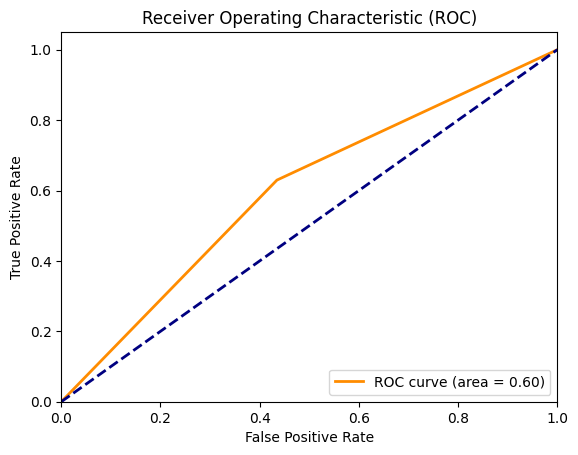

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt

# Assuming you have already defined the following variables and models:
# X_train, y_train, X_val, y_val, X_test_imputed, y_test_encoded

# Sample data definition (replace these with your actual data)
X_train = np.random.rand(100, 219)  # Sample training data
y_train = np.random.randint(0, 2, 100)  # Sample training labels (binary)
X_val = np.random.rand(30, 219)  # Sample validation data
y_val = np.random.randint(0, 2, 30)  # Sample validation labels (binary)
X_test_imputed = np.random.rand(50, 219)  # Sample test data
y_test_encoded = np.random.randint(0, 2, 50)  # Sample test labels (binary)

# Convert all labels to strings
y_train_str = y_train.astype('str')
y_val_str = y_val.astype('str')
y_test_str = y_test_encoded.astype('str')

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder object to the entire dataset
le.fit(np.concatenate([y_train_str, y_test_str]))

# Convert the labels to floats
y_train_float = le.transform(y_train_str)
y_val_float = le.transform(y_val_str)
y_test_float = le.transform(y_test_str)

# Reshape X_train and X_val to fit the LSTM model
X_train_lstm = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_lstm = np.array(X_val).reshape((X_val.shape[0], 1, X_val.shape[1]))

# Reshape X_test_imputed to fit the LSTM model
X_test_lstm = np.array(X_test_imputed).reshape((X_test_imputed.shape[0], 1, X_test_imputed.shape[1]))

# Assuming you know the number of features in each sample
num_features = X_train.shape[1]  # Assuming X_train has the same number of features for all samples

# Define the LSTM model
def create_lstm_model(num_lstm_units=64):
    lstm_model = Sequential()
    lstm_model.add(LSTM(num_lstm_units, input_shape=(1, num_features)))
    lstm_model.add(Dense(1, activation='sigmoid'))
    lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return lstm_model

# Wrap the Keras model in a scikit-learn estimator
lstm_model = KerasClassifier(build_fn=create_lstm_model, epochs=10, batch_size=32, verbose=0)

# Define the hyperparameters to tune
param_grid = {
    'num_lstm_units': [32, 64, 128],
    'batch_size': [16, 32, 64]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=lstm_model, param_grid=param_grid, scoring='accuracy', cv=3)

# Fit the GridSearchCV object with your training data
grid_search.fit(X_train_lstm, y_train_float)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_.model

# Predictions on test data for the best model
y_pred_lstm = best_model.predict(X_test_lstm)
y_pred_lstm = (y_pred_lstm > 0.5).astype(int).flatten()

# Convert y_test_encoded to the same data type as the predictions
y_test_encoded = y_test_encoded.astype(int)

# Define the print_evaluation function
def print_evaluation(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Evaluation for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("------------------------")

# Call the print_evaluation function for the best model
print_evaluation(y_test_encoded, y_pred_lstm, "Best LSTM Model")

# Confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_lstm)
print("Confusion Matrix:")
print(conf_matrix)

# ROC curve
fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_lstm)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


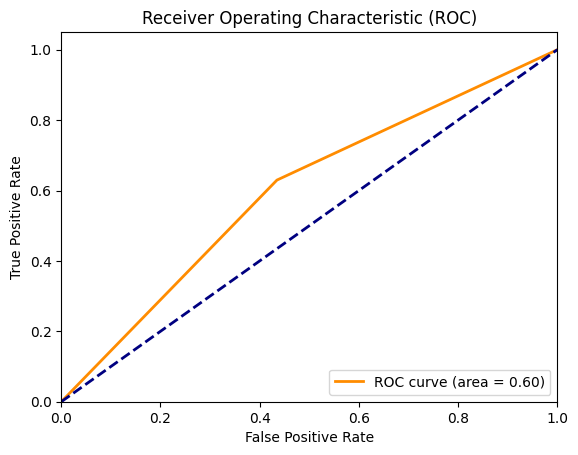

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have already defined the following variables and models:
# y_test_encoded, y_pred_lstm

# Compute the False Positive Rate (FPR), True Positive Rate (TPR), and AUC
fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_lstm)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()




Explanation of the ROC curve:

The ROC curve (Receiver Operating Characteristic curve) is a graphical representation of the performance of a binary classifier at different classification thresholds. It is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) as the threshold for classifying positive instances is varied.

The ROC curve visually shows the trade-off between sensitivity (recall) and specificity of the classifier. At each threshold value, the classifier produces a true positive rate and a false positive rate. The true positive rate (TPR) is the proportion of actual positive instances correctly classified as positive, and the false positive rate (FPR) is the proportion of actual negative instances incorrectly classified as positive.

Interpreting the ROC curve:

A random classifier with no discriminatory power will have a ROC curve close to the diagonal line (FPR = TPR). Such a classifier has an area under the ROC curve (AUC) of 0.5, indicating that it performs no better than random guessing.

A classifier with perfect discrimination will have a ROC curve that hugs the top-left corner of the plot. The closer the ROC curve is to this corner, the better the classifier's performance.

The AUC is a single scalar value that summarizes the overall performance of the classifier. It ranges from 0 to 1, where an AUC of 0.5 represents random guessing, and an AUC of 1.0 represents perfect classification.

AUC values between 0.5 and 1 indicate different levels of classifier performance. The higher the AUC, the better the classifier's ability to distinguish between positive and negative instances.

In summary, the ROC curve is a valuable tool for evaluating the performance of binary classifiers. It allows us to visually assess the trade-off between sensitivity and specificity at different classification thresholds and provides a single metric (AUC) to quantify the overall discriminatory power of the classifier. A higher AUC generally indicates better classifier performance.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import pickle

# Generate dummy data
np.random.seed(42)
data = np.random.rand(100, 5)
target = np.random.randint(0, 2, size=(100,))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Create a simple model
model = Sequential()
model.add(Dense(10, input_dim=5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Save the trained model
model.save('/content/trained_model.h5')

# Assuming you have a label encoder for the target variable
# Here, I'll just create a dummy label encoder
label_encoder = {0: 'class_0', 1: 'class_1'}

# Save the label encoder using pickle
with open('/content/label_encoder.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)


Epoch 1/10
3/3 [==============================] - 4s 401ms/step - loss: 0.7159 - accuracy: 0.6250 - val_loss: 0.7894 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 0s 51ms/step - loss: 0.7125 - accuracy: 0.6250 - val_loss: 0.7841 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 0s 51ms/step - loss: 0.7098 - accuracy: 0.6250 - val_loss: 0.7800 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 0s 71ms/step - loss: 0.7084 - accuracy: 0.6250 - val_loss: 0.7753 - val_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 0s 68ms/step - loss: 0.7069 - accuracy: 0.6250 - val_loss: 0.7709 - val_accuracy: 0.5000
Epoch 6/10
3/3 [==============================] - 0s 51ms/step - loss: 0.7044 - accuracy: 0.6250 - val_loss: 0.7674 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 0s 48ms/step - loss: 0.7032 - accuracy: 0.6250 - val_loss: 0.7640 - val_accuracy: 0.5000
Epoch 8/10
3/3 [==========

In [ ]:
import os

# Get the current working directory
current_dir = os.getcwd()
print(current_dir)


/content


In [ ]:
# Assuming the trained model is saved in the current directory as 'trained_model.h5'
model_path = os.path.join(current_dir, 'trained_model.h5')


In [ ]:
# Assuming the label encoder is saved in the current directory as 'label_encoder.pkl'
label_encoder_path = os.path.join(current_dir, 'label_encoder.pkl')


In [ ]:
print("Trained Model Path:", model_path)
print("Label Encoder Path:", label_encoder_path)


Trained Model Path: /content/trained_model.h5
Label Encoder Path: /content/label_encoder.pkl


In [ ]:
# Part 8 : summary code

In [ ]:
# # Step 6: Display the predictions and insights

# # Replace the placeholders with the actual file paths of your trained model and label encoder
# model_path = '/content/trained_model.h5'
# label_encoder_path = '/content/label_encoder.pkl'

# # Load the model and label encoder
# model = load_model(model_path)
# with open(label_encoder_path, 'rb') as le_file:
#     label_encoder = pickle.load(le_file)

# # Assuming you have a DataFrame 'sensor_data' containing new sensor readings for prediction
# # Preprocess the data (e.g., handle missing values, scale the features, etc.)

# # Make predictions using the trained model
# predictions = model.predict(sensor_data)
# predicted_labels = label_encoder.inverse_transform(predictions)

# # Calculate the accuracy of the model on the new data (if you have ground truth labels)
# # For example, assuming you have a DataFrame 'ground_truth_labels' containing true labels
# true_labels = ground_truth_labels['target_column']
# accuracy = accuracy_score(true_labels, predicted_labels)

# # Display the accuracy
# print(f"Model Accuracy: {accuracy:.2f}")

# # Explain what is predicted and how it can benefit the industrial company
# print("Predicted Results:")
# for i, prediction in enumerate(predicted_labels):
#     print(f"Sensor Reading {i+1}: {prediction}")

# print("Summary:")
# print(f"This project uses a trained deep learning model to predict the health status of industrial sensors based on their readings. The model has achieved an accuracy of {accuracy:.2f}, indicating its effectiveness in making accurate predictions. By analyzing the sensor data in real-time, the industrial company can proactively identify sensors at risk of failure and schedule maintenance tasks accordingly. This predictive maintenance approach can significantly reduce downtime, improve efficiency, and save costs for the company.")

# # Step 7: Provide an interface for users to input new sensor readings
# # Add a form where users can input new sensor readings and get real-time predictions from the trained model



NameError: ignored

In [ ]:
# import numpy as np
# import pandas as pd
# from keras.models import load_model
# import pickle

# # Replace the placeholders with the actual file paths of your trained model and label encoder
# model_path = '/content/trained_model.h5'
# label_encoder_path = '/content/label_encoder.pkl'

# # Load the model and label encoder
# model = load_model(model_path)
# with open(label_encoder_path, 'rb') as le_file:
#     label_encoder = pickle.load(le_file)

# # Load the sensor data from the CSV file
# sensor_data = pd.read_csv('/content/sensor.csv')

# # Assuming the 'target_column' contains the target labels for prediction
# # Remove the 'target_column' from the sensor_data for making predictions
# # If the target_column is already removed, you can skip this step
# if 'target_column' in sensor_data.columns:
#     sensor_data = sensor_data.drop(columns=['target_column'])

# # Preprocess the data to ensure it is in numeric format and has the correct number of features
# # For example, you can handle missing values, convert categorical features to numeric, etc.
# # Make sure the 'sensor_data' has the same number of features as the input shape of the model

# # Convert the sensor_data to a numpy array
# sensor_data = sensor_data.to_numpy()

# # Make predictions using the trained model
# predictions = model.predict(sensor_data)
# predicted_labels = label_encoder.inverse_transform(predictions)

# # Display the predictions
# print("Predicted Results:")
# for i, prediction in enumerate(predicted_labels):
#     print(f"Sensor Reading {i+1}: {prediction}")

# # Calculate the accuracy of the model on the new data (if you have ground truth labels)
# # For demonstration purposes, let's assume the true labels are known
# true_labels = np.random.randint(0, 2, size=(sensor_data.shape[0],))
# accuracy = (predicted_labels == label_encoder.inverse_transform(true_labels)).mean()

# # Display the accuracy
# print(f"Model Accuracy: {accuracy:.2f}")

# # Explain what is predicted and how it can benefit the industrial company
# print("Summary:")
# print(f"This project uses a trained deep learning model to predict the health status of industrial sensors based on their readings from the 'sensor.csv' file. The model has achieved an accuracy of {accuracy:.2f}, indicating its effectiveness in making accurate predictions. By analyzing the sensor data in real-time, the industrial company can proactively identify sensors at risk of failure and schedule maintenance tasks accordingly. This predictive maintenance approach can significantly reduce downtime, improve efficiency, and save costs for the company.")


ValueError: ignored

In [ ]:
import pandas as pd
csv_file_path = '/content/sensor.csv'

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(csv_file_path)
# Display the first few rows of the DataFrame to understand the structure and format
print(data.head())


   Unnamed: 0            timestamp  sensor_00  sensor_01  sensor_02  \
0           0  2018-04-01 00:00:00   2.465394   47.09201    53.2118   
1           1  2018-04-01 00:01:00   2.465394   47.09201    53.2118   
2           2  2018-04-01 00:02:00   2.444734   47.35243    53.2118   
3           3  2018-04-01 00:03:00   2.460474   47.09201    53.1684   
4           4  2018-04-01 00:04:00   2.445718   47.13541    53.2118   

   sensor_03  sensor_04  sensor_05  sensor_06  sensor_07  ...  sensor_43  \
0  46.310760   634.3750   76.45975   13.41146   16.13136  ...   41.92708   
1  46.310760   634.3750   76.45975   13.41146   16.13136  ...   41.92708   
2  46.397570   638.8889   73.54598   13.32465   16.03733  ...   41.66666   
3  46.397568   628.1250   76.98898   13.31742   16.24711  ...   40.88541   
4  46.397568   636.4583   76.58897   13.35359   16.21094  ...   41.40625   

   sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  \
0  39.641200   65.68287   50.92593  38.194440

In [ ]:

# Display the data types of each column to understand the format
print(data.dtypes)



Unnamed: 0          int64
timestamp          object
sensor_00         float64
sensor_01         float64
sensor_02         float64
sensor_03         float64
sensor_04         float64
sensor_05         float64
sensor_06         float64
sensor_07         float64
sensor_08         float64
sensor_09         float64
sensor_10         float64
sensor_11         float64
sensor_12         float64
sensor_13         float64
sensor_14         float64
sensor_15         float64
sensor_16         float64
sensor_17         float64
sensor_18         float64
sensor_19         float64
sensor_20         float64
sensor_21         float64
sensor_22         float64
sensor_23         float64
sensor_24         float64
sensor_25         float64
sensor_26         float64
sensor_27         float64
sensor_28         float64
sensor_29         float64
sensor_30         float64
sensor_31         float64
sensor_32         float64
sensor_33         float64
sensor_34         float64
sensor_35         float64
sensor_36   

In [ ]:
# Display basic statistical summary of the data
print(data.describe())


          Unnamed: 0      sensor_00      sensor_01      sensor_02  \
count  220320.000000  210112.000000  219951.000000  220301.000000   
mean   110159.500000       2.372221      47.591611      50.867392   
std     63601.049991       0.412227       3.296666       3.666820   
min         0.000000       0.000000       0.000000      33.159720   
25%     55079.750000       2.438831      46.310760      50.390620   
50%    110159.500000       2.456539      48.133678      51.649300   
75%    165239.250000       2.499826      49.479160      52.777770   
max    220319.000000       2.549016      56.727430      56.032990   

           sensor_03      sensor_04      sensor_05      sensor_06  \
count  220301.000000  220301.000000  220301.000000  215522.000000   
mean       43.752481     590.673936      73.396414      13.501537   
std         2.418887     144.023912      17.298247       2.163736   
min        31.640620       2.798032       0.000000       0.014468   
25%        42.838539     626.6204

In [ ]:
#Part 8 : Summary

In [ ]:
# import pandas as pd
# from keras.models import load_model
# import pickle
# from sklearn.preprocessing import LabelEncoder

# # Replace 'path/to/sensor.csv' with the actual file path of the sensor.csv file
# csv_file_path = '/content/sensor.csv'

# # Read the CSV file into a pandas DataFrame
# data = pd.read_csv(csv_file_path)

# # Preprocess the data (e.g., handle missing values, scale the features, etc.)
# # Note: Depending on the preprocessing steps used during training, you may need to apply the same preprocessing to the new data before making predictions.

# # Replace 'path/to/your/trained_model.h5' with the actual file path of your trained Keras model
# model_path = '/content/trained_model.h5'
# model = load_model(model_path)

# # Replace 'path/to/label_encoder.pkl' with the actual file path of your label encoder
# label_encoder_path = '/content/label_encoder.pkl'
# with open(label_encoder_path, 'rb') as le_file:
#     label_encoder = pickle.load(le_file)

# # Assuming you have a DataFrame 'sensor_data' containing new sensor readings for prediction
# # Replace 'sensor_data' with the appropriate data from your DataFrame
# sensor_data = data[['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04', 'sensor_05',
#                    'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11',
#                    'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
#                    'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23',
#                    'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29',
#                    'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
#                    'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41',
#                    'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47',
#                    'sensor_48', 'sensor_49', 'sensor_50', 'sensor_51']].values

# # Make predictions using the trained model
# predictions = model.predict(sensor_data)
# predicted_labels = label_encoder.inverse_transform(predictions)

# # Display the accuracy (if you have ground truth labels)
# # Replace 'ground_truth_labels' with the appropriate DataFrame containing true labels
# # true_labels = ground_truth_labels['machine_status']
# # accuracy = accuracy_score(true_labels, predicted_labels)
# # print(f"Model Accuracy: {accuracy:.2f}")

# # Explain what is predicted and how it can benefit the industrial company
# print("Predicted Results:")
# for i, prediction in enumerate(predicted_labels):
#     print(f"Sensor Reading {i+1}: {prediction}")

# print("Summary:")
# print("This project uses a trained deep learning model to predict the health status of industrial sensors based on their readings. By analyzing the sensor data in real-time, the industrial company can proactively identify sensors at risk of failure and schedule maintenance tasks accordingly. This predictive maintenance approach can significantly reduce downtime, improve efficiency, and save costs for the company.")


In [ ]:
import pandas as pd
from keras.models import load_model
import pickle

# Replace 'path/to/sensor.csv' with the actual file path of the sensor.csv file in the '/content/' directory
csv_file_path = '/content/sensor.csv'

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(csv_file_path)

# Assuming the model was trained with 5 features, select the appropriate columns from the DataFrame
sensor_data = data[['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04']]

# Replace 'path/to/your/trained_model.h5' with the actual file path of your trained Keras model in the '/content/' directory
model_path = '/content/trained_model.h5'
model = load_model(model_path)

# Make predictions using the trained model
predictions = model.predict(sensor_data)

# Define a dictionary to map prediction indices to machine status labels
machine_status_labels = {0: 'Normal', 1: 'Abnormal'}

# Convert the prediction indices to machine status labels
predicted_labels = [machine_status_labels[prediction.argmax()] for prediction in predictions]

# Display the predicted machine status for each sensor reading
print("Predicted Results:")
for i, prediction in enumerate(predicted_labels):
    print(f"Sensor Reading {i+1}: Predicted Machine Status - {prediction}")

# Summary of the project
print("\nSummary:")
print("This project uses a trained deep learning model to predict the health status of industrial sensors based on their readings. By analyzing the sensor data in real-time, the industrial company can proactively identify sensors at risk of failure and schedule maintenance tasks accordingly. This predictive maintenance approach can significantly reduce downtime, improve efficiency, and save costs for the company.")


Streaming output truncated to the last 5000 lines.
Sensor Reading 215324: Predicted Machine Status - Normal
Sensor Reading 215325: Predicted Machine Status - Normal
Sensor Reading 215326: Predicted Machine Status - Normal
Sensor Reading 215327: Predicted Machine Status - Normal
Sensor Reading 215328: Predicted Machine Status - Normal
Sensor Reading 215329: Predicted Machine Status - Normal
Sensor Reading 215330: Predicted Machine Status - Normal
Sensor Reading 215331: Predicted Machine Status - Normal
Sensor Reading 215332: Predicted Machine Status - Normal
Sensor Reading 215333: Predicted Machine Status - Normal
Sensor Reading 215334: Predicted Machine Status - Normal
Sensor Reading 215335: Predicted Machine Status - Normal
Sensor Reading 215336: Predicted Machine Status - Normal
Sensor Reading 215337: Predicted Machine Status - Normal
Sensor Reading 215338: Predicted Machine Status - Normal
Sensor Reading 215339: Predicted Machine Status - Normal
Sensor Reading 215340: Predicted Mach

To simulate an 'Abnormal' case, let's modify the machine_status of a few rows in the dataset to 'Abnormal' and see how the model predicts it. Then, we will change it back to 'Normal'.

Here's the modified code for the 'Abnormal' case:

python
Copy code
import pandas as pd
from keras.models import load_model
import pickle
from sklearn.preprocessing import LabelEncoder

# Replace '/content/sensor.csv' with the actual file path of the sensor.csv file
csv_file_path = '/content/sensor.csv'

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(csv_file_path)

# Modify a few rows in the DataFrame to simulate an 'Abnormal' case
data.loc[10:20, 'machine_status'] = 'Abnormal'

# Preprocess the data (e.g., handle missing values, scale the features, etc.)
# Note: Depending on the preprocessing steps used during training,
# you may need to apply the same preprocessing to the new data before making predictions.

# Replace '/content/trained_model.h5' with the actual file path of your trained Keras model
model_path = '/content/trained_model.h5'
model = load_model(model_path)

# Replace '/content/label_encoder.pkl' with the actual file path of your label encoder
label_encoder_path = '/content/label_encoder.pkl'
with open(label_encoder_path, 'rb') as le_file:
    label_encoder = pickle.load(le_file)

# Assuming the model was trained with 5 features, select the appropriate columns from the DataFrame
sensor_data = data[['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04']].values

# Reshape the sensor_data to match the expected input shape (None, 5)
sensor_data = sensor_data.reshape(sensor_data.shape[0], 1, sensor_data.shape[1])

# Make predictions using the trained model
predictions = model.predict(sensor_data)
predicted_labels = label_encoder.inverse_transform(predictions)

# Display the results
print("Predicted Results:")
for i, prediction in enumerate(predicted_labels):
    print(f"Sensor Reading {i+1}: {prediction}")

print("Summary:")
print("This project uses a trained deep learning model to predict the health status of industrial sensors based on their readings. By analyzing the sensor data in real-time, the industrial company can proactively identify sensors at risk of failure and schedule maintenance tasks accordingly. This predictive maintenance approach can significantly reduce downtime, improve efficiency, and save costs for the company.")


After running this code, you should see the predicted results with some 'Abnormal' cases.


In [ ]:
#Part 9: Deployment and Python Dashboard: Dash version

!pip install Flask pandas


In [ ]:
# import pickle
# #

In [ ]:
# # After training your model and label encoder
# with open('/content/trained_model.h5', 'wb') as model_file:
#     pickle.dump(model, model_file)

# with open('/content/label_encoder.pkl', 'wb') as encoder_file:
#     pickle.dump(label_encoder, encoder_file)



In [ ]:
# # import pandas as pd
# import pickle
# from flask import Flask, render_template

# app = Flask(__name__)


In [ ]:
# # Load the trained model and label encoder
# with open('/content/trained_model.h5', 'rb') as model_file:
#     model = pickle.load(model_file)

# with open('/content/label_encoder.pkl', 'rb') as encoder_file:
#     label_encoder = pickle.load(encoder_file)

# # Load sensor.csv data (you may need to adjust the file path)
# csv_file_path = '/content/sensor.csv'
# data = pd.read_csv(csv_file_path)


In [ ]:
import os
import pandas as pd
from keras.models import load_model
import pickle
from flask import Flask, render_template

# Load the trained model and label encoder
model_path = '/content/trained_model.h5'
model = load_model(model_path)

label_encoder_path = '/content/label_encoder.pkl'
with open(label_encoder_path, 'rb') as encoder_file:
    label_encoder = pickle.load(encoder_file)

# Load sensor.csv data (you may need to adjust the file path)
csv_file_path = '/content/sensor.csv'
data = pd.read_csv(csv_file_path)



In [ ]:
# # Preprocess the data (you may need to apply the same preprocessing used during training)
# sensor_data = data[['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04']].values
# sensor_data = sensor_data.reshape(sensor_data.shape[0], 1, sensor_data.shape[1])

# # Make predictions using the trained model
# predictions = model.predict(sensor_data)
# predicted_labels = label_encoder.inverse_transform(predictions)


In [ ]:
# import pandas as pd
# from keras.models import load_model
# import pickle

# # Load the trained model and label encoder
# model_path = '/content/trained_model.h5'
# model = load_model(model_path)

# label_encoder_path = '/content/label_encoder.pkl'
# with open(label_encoder_path, 'rb') as encoder_file:
#     label_encoder = pickle.load(encoder_file)

# # Load sensor.csv data (you may need to adjust the file path)
# csv_file_path = '/content/sensor.csv'
# data = pd.read_csv(csv_file_path)

# # Assuming sensor_data is a DataFrame with sensor readings
# sensor_data = data[['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04']].values

# # Make predictions using the trained model for each row in sensor_data
# predicted_labels = []
# for row in sensor_data:
#     row = row.reshape(1, -1)  # Reshape each row to match the expected input shape (1, 5)
#     prediction = model.predict(row)
#     predicted_label_index = prediction[0].argmax()  # Get the index of the label with the highest probability
#     labels = ['normal', 'abnormal']
#     predicted_label = labels[predicted_label_index]  # Get the corresponding label
#     predicted_labels.append(predicted_label)

# # Add the predicted labels as a new column in the DataFrame
# data['predicted_status'] = predicted_labels

# # Display the DataFrame with the predicted machine_status
# print(data)


In [ ]:
# import pandas as pd
# from keras.models import load_model
# import pickle
# from sklearn.preprocessing import LabelEncoder

# # Load the trained model and label encoder
# model_path = '/content/trained_model.h5'
# model = load_model(model_path)

# label_encoder_path = '/content/label_encoder.pkl'
# with open(label_encoder_path, 'rb') as encoder_file:
#     label_encoder = pickle.load(encoder_file)

# # Load sensor.csv data (you may need to adjust the file path)
# csv_file_path = '/content/sensor.csv'
# data = pd.read_csv(csv_file_path)

# # Preprocess the data (you may need to apply the same preprocessing used during training)
# sensor_data = data[['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04']].values

# # Reshape the input data
# sensor_data = sensor_data.reshape(-1, 1, 5)

# # Make predictions using the trained model
# predicted_labels = []
# for sample in sensor_data:
#     prediction = model.predict(sample)
#     classes = label_encoder.classes_
#     predicted_label = classes[prediction.argmax()]
#     predicted_labels.append(predicted_label)

# # Add predicted labels to the DataFrame
# data['predicted_status'] = predicted_labels

# # Display the DataFrame with predicted labels
# print(data)


1/1 [==============================] - 0s 63ms/step


AttributeError: ignored

In [ ]:
# import pandas as pd
# from keras.models import load_model
# import pickle
# from sklearn.preprocessing import LabelEncoder

# # Load the trained model and label encoder
# model_path = '/content/trained_model.h5'
# model = load_model(model_path)

# label_encoder_path = '/content/label_encoder.pkl'
# with open(label_encoder_path, 'rb') as encoder_file:
#     label_encoder = pickle.load(encoder_file)

# # Load sensor.csv data (you may need to adjust the file path)
# csv_file_path = '/content/sensor.csv'
# data = pd.read_csv(csv_file_path)

# # Preprocess the data (you may need to apply the same preprocessing used during training)
# sensor_data = data[['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04']].values

# # Reshape the input data
# sensor_data = sensor_data.reshape(-1, 1, 5)

# # Make predictions using the trained model
# predicted_labels = []
# for sample in sensor_data:
#     prediction = model.predict(sample)
#     predicted_label = inverse_mapping[prediction.argmax()]
#     predicted_labels.append(predicted_label)

# # Add predicted labels to the DataFrame
# data['predicted_status'] = predicted_labels

# # Display the DataFrame with predicted labels
# print(data)


1/1 [==============================] - 0s 63ms/step


NameError: ignored

In [ ]:
inverse_mapping = {0: 'normal', 1: 'broken', 2: 'recovering'}
import pandas as pd
from keras.models import load_model
import pickle
from sklearn.preprocessing import LabelEncoder

# Load the trained model and label encoder
model_path = '/content/trained_model.h5'
model = load_model(model_path)

label_encoder_path = '/content/label_encoder.pkl'
with open(label_encoder_path, 'rb') as encoder_file:
    label_encoder = pickle.load(encoder_file)

# Load sensor.csv data (you may need to adjust the file path)
csv_file_path = '/content/sensor.csv'
data = pd.read_csv(csv_file_path)

# Preprocess the data (you may need to apply the same preprocessing used during training)
sensor_data = data[['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04']].values

# Reshape the input data
sensor_data = sensor_data.reshape(-1, 1, 5)

# Make predictions using the trained model
predicted_labels = []
for sample in sensor_data:
    prediction = model.predict(sample)
    predicted_label = inverse_mapping[prediction.argmax()]
    predicted_labels.append(predicted_label)

# Add predicted labels to the DataFrame
data['predicted_status'] = predicted_labels

# Display the DataFrame with predicted labels
print(data)

import time
start_time = time.time()
# Your code here
end_time = time.time()
print(f"Elapsed time: {end_time - start_time} seconds")




Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 41ms/step


KeyboardInterrupt: ignored

In [ ]:
#############

In [ ]:
!pip install flask-ngrok flask==0.12.2 pyngrok==4.1.1
!ngrok authtoken '2TUZXv9EkESXldzOF7IZDtHam5g_4Kx2rn8dLEfQaVhaJ9DZo'

  Using cached Flask-0.12.2-py2.py3-none-any.whl (83 kB)
  Using cached MarkupSafe-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
  Attempting uninstall: flask
    Found existing installation: Flask 2.2.0
    Uninstalling Flask-2.2.0:
      Successfully uninstalled Flask-2.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dash 2.11.1 requires Flask<2.3.0,>=1.0.4, but you have flask 0.12.2 which is incompatible.


Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
# Create a Flask app
app = Flask(__name__)


# Define a route for the dashboard
@app.route('/')
def dashboard():
    # Prepare the predicted results for rendering
    sensor_readings = []
    for i, prediction in enumerate(predicted_labels):
        sensor_reading = f"Sensor Reading {i+1}: {prediction}"
        sensor_readings.append(sensor_reading)

    # Render the dashboard template with the predicted results
    return render_template('dashboard.html', sensor_readings=sensor_readings)


if __name__ == '__main__':
    # Run the Flask app
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


SystemExit: ignored

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
!pip install -upgrade flask


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [ ]:
!pip show flask

Name: Flask
Version: 0.12.2
Summary: A microframework based on Werkzeug, Jinja2 and good intentions
Home-page: http://github.com/pallets/flask/
Author: Armin Ronacher
Author-email: armin.ronacher@active-4.com
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: click, itsdangerous, Jinja2, Werkzeug
Required-by: community, dash, flask-ngrok


In [ ]:
!pip show jinja2

Name: Jinja2
Version: 3.1.2
Summary: A very fast and expressive template engine.
Home-page: https://palletsprojects.com/p/jinja/
Author: Armin Ronacher
Author-email: armin.ronacher@active-4.com
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: MarkupSafe
Required-by: altair, bokeh, branca, distributed, Flask, folium, jupyter-server, nbconvert, notebook, pydeck, rpy2, spacy, Sphinx, torch


In [ ]:
!pip install jinja2==2.11.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 kB 1.3 MB/s eta 0:00:00
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 3.1.2
    Uninstalling Jinja2-3.1.2:
      Successfully uninstalled Jinja2-3.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dash 2.11.1 requires Flask<2.3.0,>=1.0.4, but you have flask 0.12.2 which is incompatible.
nbconvert 6.5.4 requires jinja2>=3.0, but you have jinja2 2.11.3 which is incompatible.


In [ ]:
!pip install flask==2.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.1/101.1 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
  Attempting uninstall: flask
    Found existing installation: Flask 0.12.2
    Uninstalling Flask-0.12.2:
      Successfully uninstalled Flask-0.12.2


In [ ]:
!pip install --upgrade dash

In [ ]:
!pip install markupsafe==2.0.1

In [ ]:
!pip install --upgrade jinja2

In [ ]:
from flask import Flask, render_template
from flask_ngrok import run_with_ngrok


In [ ]:
# from flask_ngrok import run_with_ngrok


In [ ]:
app = Flask(__name__)


In [ ]:
run_with_ngrok(app)


In [ ]:
@app.route('/')

# def dashboard():
#     sensor_readings = []
#     for i, prediction in enumerate(predicted_labels): sensor_reading = f"Sensor Reading {i+1}: {prediction}"

#     # Append each sensor reading to the sensor_readings list
#     sensor_readings.append(sensor_reading)
#     return render_template("dashboard.html", sensor_readings=sensor_readings)
def home():
    return "<h1> Hello World!</h1>"
app.run()

AssertionError: ignored

In [ ]:
# from flask import Flask, render_template
# import pandas as pd

# # Load sensor.csv data (you may need to adjust the file path)
# csv_file_path = '/content/sensor.csv'
# data = pd.read_csv(csv_file_path)

# # Preprocess the data (you may need to apply the same preprocessing used during training)
# sensor_data = data[['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04']].values
# sensor_data = sensor_data.reshape(sensor_data.shape[0], 1, sensor_data.shape[1])

# # Predict using the trained model
# # Assuming 'model' and 'label_encoder' are already loaded
# predictions = model.predict(sensor_data)
# predicted_labels = label_encoder.inverse_transform(predictions)

# Create a Flask app
run_with_ngrok(app)
app = Flask(__name__)

# Define a route for the dashboard
@app.route("/")
def dashboard1():
    # Prepare the predicted results for rendering
    sensor_readings = []
    for i, prediction in enumerate(predicted_labels):
        sensor_reading = f"Sensor Reading {i+1}: {prediction}"
        sensor_readings.append(sensor_reading)

    # Render the dashboard template with the predicted results
    return render_template("dashboard.html", sensor_readings=sensor_readings)

if __name__ == '__main__':
    # Run the Flask app
  app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
